**Import libraries**

In [9]:
## from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,mean_squared_error,mean_absolute_error

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [10]:
# Reading t
filename=r'Datasets\Question-4\weather.csv'
df = pd.read_csv(filename)


Formatted Date        Summary Precip Type  Temperature (C)  \
0  2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain         9.472222   
1  2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain         9.355556   
2  2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain         9.377778   

   Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                  7.388889      0.89            14.1197   
1                  7.227778      0.86            14.2646   
2                  9.377778      0.89             3.9284   

   Wind Bearing (degrees)  Visibility (km)  Pressure (millibars)  \
0                     251          15.8263               1015.13   
1                     259          15.8263               1015.63   
2                     204          14.9569               1015.94   

                       Daily Summary  
0  Partly cloudy throughout the day.  
1  Partly cloudy throughout the day.  
2  Partly cloudy throughout the day.

**Descriptive Analytics**

In [ ]:
df.head(3)

In [11]:
# data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77285 entries, 0 to 77284
Data columns (total 11 columns):
Formatted Date              77285 non-null object
Summary                     77285 non-null object
Precip Type                 76881 non-null object
Temperature (C)             77285 non-null float64
Apparent Temperature (C)    77285 non-null float64
Humidity                    77285 non-null float64
Wind Speed (km/h)           77285 non-null float64
Wind Bearing (degrees)      77285 non-null int64
Visibility (km)             77285 non-null float64
Pressure (millibars)        77285 non-null float64
Daily Summary               77285 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 6.5+ MB


In [12]:
df.shape,df.size

((77285, 11), 850135)

In [13]:
list(df.columns)

['Formatted Date',
 'Summary',
 'Precip Type',
 'Temperature (C)',
 'Apparent Temperature (C)',
 'Humidity',
 'Wind Speed (km/h)',
 'Wind Bearing (degrees)',
 'Visibility (km)',
 'Pressure (millibars)',
 'Daily Summary']

In [14]:
df.describe(include='all')

Formatted Date        Summary Precip Type  \
count                           77285          77285       76881   
unique                          77268             26           2   
top     2010-08-02 03:00:00.000 +0200  Partly Cloudy        rain   
freq                                2          25427       68233   
mean                              NaN            NaN         NaN   
std                               NaN            NaN         NaN   
min                               NaN            NaN         NaN   
25%                               NaN            NaN         NaN   
50%                               NaN            NaN         NaN   
75%                               NaN            NaN         NaN   
max                               NaN            NaN         NaN   

        Temperature (C)  Apparent Temperature (C)      Humidity  \
count      77285.000000              77285.000000  77285.000000   
unique              NaN                       NaN           NaN   
top                 NaN                       NaN           NaN   
freq                NaN                       NaN           NaN   
mean          11.932073                 10.851287      0.734422   
std            9.568044                 10.720713      0.195435   
min          -21.822222                -27.716667      0.000000   
25%            4.561111                  2.272222      0.600000   
50%           11.994444                 11.994444      0.780000   
75%           18.850000                 18.850000      0.890000   
max           39.905556                 38.416667      1.000000   

        Wind Speed (km/h)  Wind Bearing (degrees)  Visibility (km)  \
count        77285.000000            77285.000000     77285.000000   
unique                NaN                     NaN              NaN   
top                   NaN                     NaN              NaN   
freq                  NaN                     NaN              NaN   
mean            10.802289              187.739678        10.350661   
std              6.896763              107.337926         4.189296   
min              0.000000                0.000000         0.000000   
25%              5.828200              117.000000         8.339800   
50%              9.965900              180.000000        10.046400   
75%             14.135800              290.000000        14.812000   
max             63.852600              359.000000        16.100000   

        Pressure (millibars)                      Daily Summary  
count           77285.000000                              77285  
unique                   NaN                                214  
top                      NaN  Mostly cloudy throughout the day.  
freq                     NaN                              15986  
mean             1003.218889                                NaN  
std               117.080764                                NaN  
min                 0.000000                                NaN  
25%              1011.910000                                NaN  
50%              1016.470000                                NaN  
75%              1021.080000                                NaN  
max              1046.380000                                NaN

**Find the correlation between all columns**

Plot the correlation of features and target variable with each other using heatmap.
This plot gives a clear intuition of relationship of target variable with features.


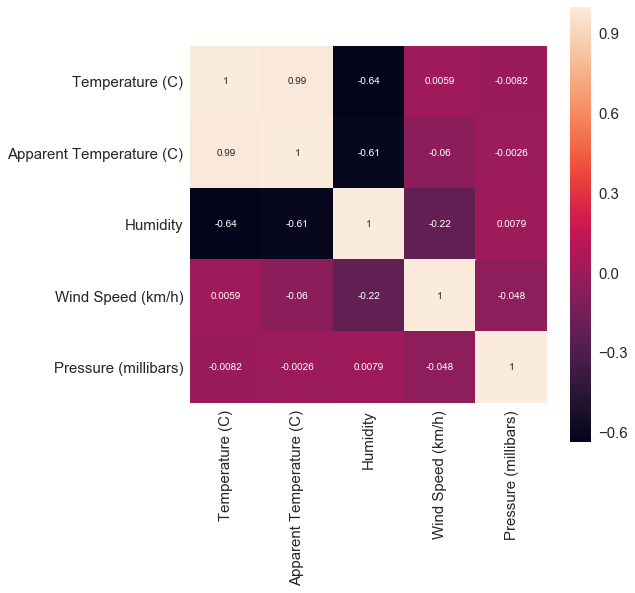

In [62]:
import seaborn as sns
fig = plt.subplots(figsize = (8,8))
sns.set(font_scale=1.5)
sns.heatmap(df.corr(),square = True,cbar=True,annot=True,annot_kws={'size': 10})
plt.show()

Correlation varies between +1 to -1, +1 indicates strong positive correlation, Correlation coefficient of -1 signifies perfect negative relationship, and correlation of 0 means that no relationship exists between variables.


From the plot above, we see strong relationship between temperature and apparent temperature, humidity.

In [16]:
#Dropping unnecessary Columns. (which includes text.)
cols = ['Formatted Date','Summary','Precip Type','Daily Summary','Wind Bearing (degrees)','Visibility (km)']
df = df.drop(cols,axis=1)

Correletation after retaining only relevant attributes

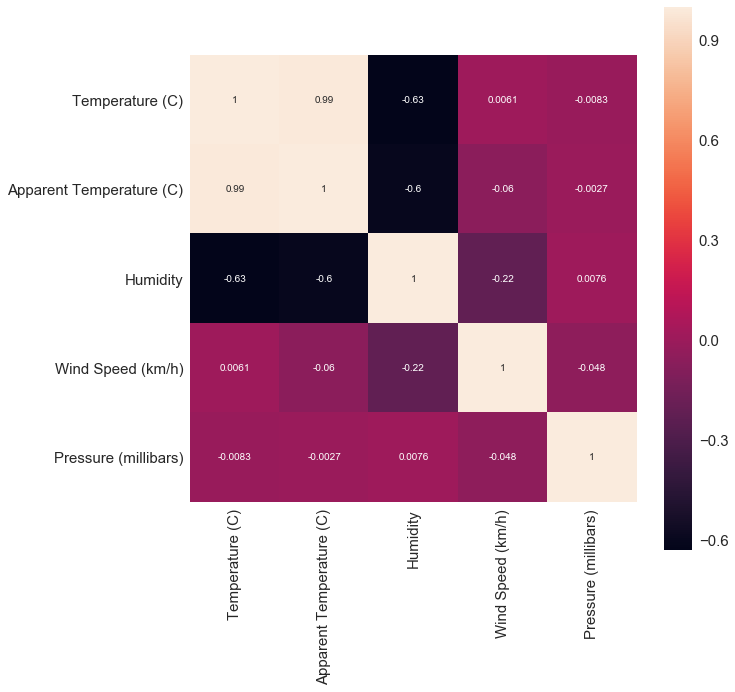

In [17]:
fig = plt.subplots(figsize = (10,10))
sns.set(font_scale=1.5)
sns.heatmap(df.corr(),square = True,cbar=True,annot=True,annot_kws={'size': 10})
plt.show()

Visualization of the data between temperature and other dependent variables.

Removing date from the correlation plot

In [18]:
list(df.columns[1:])

['Apparent Temperature (C)',
 'Humidity',
 'Wind Speed (km/h)',
 'Pressure (millibars)']

In [19]:
def plotFeatures(col_list,title):
    plt.figure(figsize=(5, 7))
    for col in col_list:
        plt.plot(df[col],df['Apparent Temperature (C)'],marker='.',linestyle='none')
        plt.title(title % (col))   
        plt.show()

In [20]:
cols=['Temperature (C)','Humidity','Wind Speed (km/h)','Pressure (millibars)']

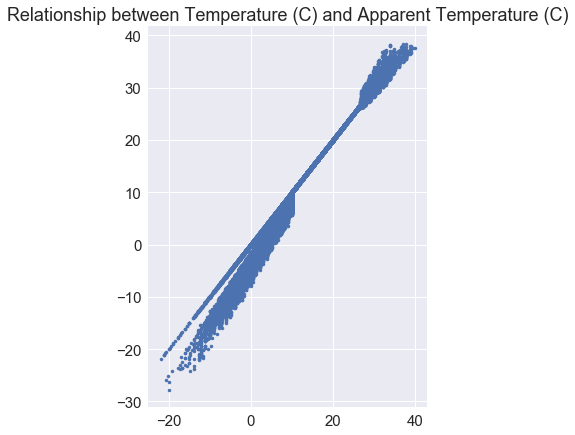

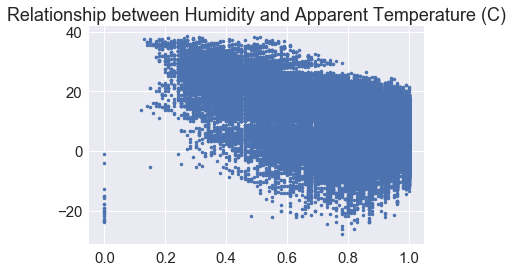

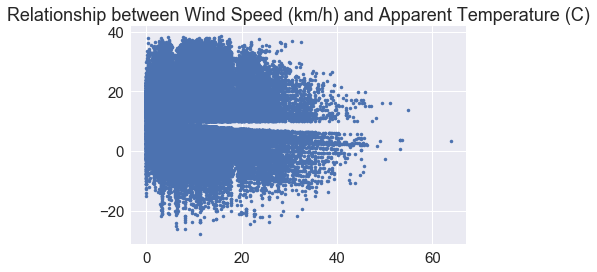

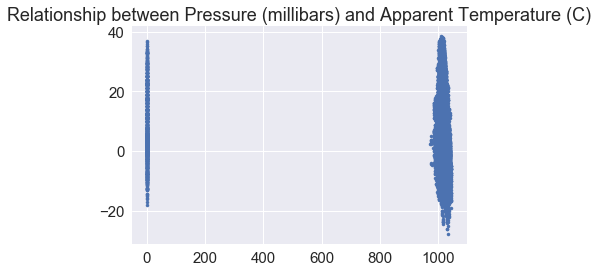

In [21]:
plotFeatures(cols,"Relationship between %s and Apparent Temperature (C)")


There is a negative correlationship between Humidity and Apparent Temperature
There are also outliers in this relationship. We can correct those.

In [22]:
def getOutliers(data):
    outliers=[]
    threshold=3
    mean_1 = np.mean(data)
    std_1 =np.std(data)
    
    for y in data:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

In [23]:
outlier_data = getOutliers(df["Humidity"])
print (outlier_data)

[0.14, 0.14, 0.14, 0.13, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.12, 0.14]


For a clean dataset, we drop the rows that have Humidity less than 0.14

In [24]:
df = df[df["Humidity"]>max(outlier_data)]

Now the outliers are addresses

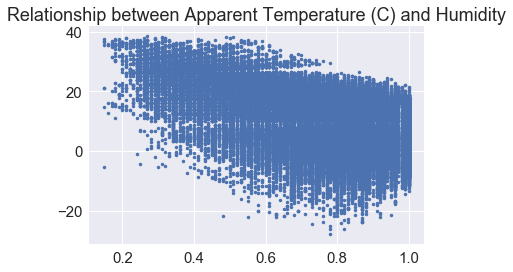

In [25]:
plt.plot(df['Humidity'],df['Apparent Temperature (C)'],marker='.',linestyle='none')
plt.title('Relationship between Apparent Temperature (C) and Humidity')   
plt.show()

Normalize the data

In [26]:
X = df[['Temperature (C)','Humidity','Wind Speed (km/h)','Pressure (millibars)']]
y= df['Apparent Temperature (C)']    

In [27]:
X.head(3)

Temperature (C)  Humidity  Wind Speed (km/h)  Pressure (millibars)
0         9.472222      0.89            14.1197               1015.13
1         9.355556      0.86            14.2646               1015.63
2         9.377778      0.89             3.9284               1015.94

In [28]:
y.head(3)

0    7.388889
1    7.227778
2    9.377778
Name: Apparent Temperature (C), dtype: float64

In [29]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [30]:
# fitting Multiple Linear regression to Training set
from sklearn.linear_model import LinearRegression
regressor =LinearRegression(n_jobs=4, normalize=True)
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=4, normalize=True)

In [31]:
regressor.coef_

array([  1.12641635e+00,   1.05339145e+00,  -9.56286840e-02,
         2.29550420e-04])

In [32]:
regressor.intercept_

-2.5582995099397863

In [33]:
# predicting test set result
y_pred = regressor.predict(X_test)

In [34]:
#Returns the coefficient of determination
regressor.score(X,y)

0.98989114094797681

In [35]:
from sklearn import metrics
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error:  0.853255612768
Mean Squared Error:  1.17197681
Root Mean Squared Error:  1.08257877773


In [36]:
df.isnull().sum() # No nulls found

Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Pressure (millibars)        0
dtype: int64

**Class to implement linear regression from scratch**

In [37]:
class Weather:
    def __init__(self, learning_rate=0.01, tolerance=0.02, epochs=500): 
        self.learning_rate=learning_rate
        self.tolerance = tolerance
        self.epochs=epochs # no of iterations for gradient descent
        self.W=[]
    
    def initWeights(self,X):
        #INITALIZE WEIGHTS WITH RANDOM NUMBERS X(1,X1,X2,...) FOR (W0,W1,W2...)
        self.W=np.random.randn(X.shape[1])  
        
    def getCost(self,X,y):
        num_rows =len(y)
        error=X.dot(self.W)-y
        self.J=(1/(2*num_rows))*np.sum(np.square(error))        
        return self.J
    
    def cost_function(X, Y, B):
         m = len(Y)
         J = np.sum((X.dot(B)- Y) ** 2)/(2 * m)
         return J

    def train(self,X,y):
        num_rows =len(y) #no of rows        
        X = np.c_[np.ones(num_rows),X]
        self.initWeights(X)
        self.costs= []
        for i in range(self.epochs):
            error=X.dot(self.W)-y            
            cost=self.getCost(X,y)
#            if i % 10 == 0:
#                print("Cost at 10 step iteration {0}: {1}".format(i,cost))
            self.costs.append(cost)
            gradient = np.dot(X.T, error)/num_rows          
            self.W=self.W-(self.learning_rate)*gradient
        return self.W,self.costs
         
    def predict(self,X):
        X = np.c_[np.ones(len(X)),X] 
        y=X.dot(self.W) 
        return y

**SKLEARN OUTPUT**

In [38]:
X = df[['Temperature (C)','Humidity','Wind Speed (km/h)','Pressure (millibars)']]
y= df['Apparent Temperature (C)']  
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)


# fitting Multiple Linear regression to Training set
regressor =LinearRegression(n_jobs=4,normalize=False)
regressor.fit(X, y)
W=[ float("%.4f" % float(item)) for item in regressor.coef_ ]
W.insert(0,float("%.4f" % float(regressor.intercept_)))
print('Coeff count   :',len(W))
y_pred=regressor.predict(X)
print('Mean Absolute Error: ', metrics.mean_absolute_error(y, y_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(y, y_pred))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y, y_pred)))
print('R Square: ', metrics.r2_score(y,y_pred))

print("The linear model is:\n Apparent Temperature (C)= {:.5} + {:.5}*Temparature + {:.5}*Humidity + \
      {:.5}*WindSpeed + {:.5}*Pressure".format(W[0], W[1], W[2], W[3], W[4]))


SKLEARN OUTPUT
Coeff count   : 5
Mean Absolute Error:  0.848282453392
Mean Squared Error:  1.15976262677
Root Mean Squared Error:  1.07692275803
R Square:  0.989891204197
The linear model is:
 Apparent Temperature (C)= 10.857 + 10.768*Temparature + 0.2068*Humidity +       -0.6576*WindSpeed + 0.0274*Pressure


In [39]:
learning_rate=0.01 
tolerance=0.02
epochs=2000

wr=Weather(learning_rate, tolerance, epochs)
W,costs=wr.train(X,y)
y_pred=wr.predict(X)

**IMPLEMENTATION OUTPUT**

In [40]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y, y_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(y, y_pred))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y, y_pred)))
print('R Square: ', metrics.r2_score(y,y_pred))

print("\nThe linear model is: \nApparent Temperature (C)= {:.5} + {:.5}*Temparature + {:.5}*Humidity + \
      {:.5}*WindSpeed + {:.5}*Pressure".format(W[0], W[1], W[2], W[3], W[4]))

Mean Absolute Error:  0.848398435934
Mean Squared Error:  1.15980866588
Root Mean Squared Error:  1.07694413313
R Square:  0.989890802908

The linear model is: 
Apparent Temperature (C)= 10.857 + 10.76*Temparature + 0.19846*Humidity +       -0.66036*WindSpeed + 0.027192*Pressure


Text(0.5,1,'Error vs. Training Epoch')

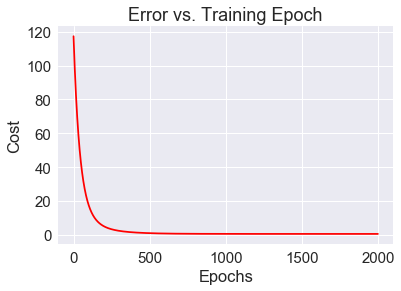

In [41]:
fig, ax = plt.subplots()  
ax.plot(np.arange(epochs), costs, 'r')  
ax.set_xlabel('Epochs')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch')  

Compare the performance of different error functions ( Mean square error, Mean Absolute error, Mean absolute percentage error) and explain the reasons for the observed behaviour.

**Mean Absolute Error**

    Sum of absolute differences between actual and predicted values
    Avergae of this sum is the MAE

    The higher this value, the worse the model is.
    Perform extremely well on training data but might fail miserably when it encounters testing data-- Overfitting
    It penalizes huge errors.
    MAE does not indicate underperformance or overperformance of the model . 
    Each residual contributes proportionally to the total amount of error.
    A small MAE suggests the model is great at prediction.
    A MAE of 0 means that  model is a perfect predictor of the outputs 
    Problematic behaviour if we have noisy data 
    MAE contributes proportionally to the total error,

In [53]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_valid, y_valid = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [54]:
learning_rate=0.01 
tolerance=0.02
epochs=2000

wr=Weather(learning_rate, tolerance, epochs)
W,costs=wr.train(X_train,y_train)
y_pred=wr.predict(X_train)

In [55]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_train, y_pred))

Mean Absolute Error:  0.847259163297


**Mean Square Error**

    Sum of square of differences between actual and predicted values
    Avergae of this sum is the MSE

    Since we are squaring ,MSE will almost always be bigger than the MAE
    Error grows quadratically in MSE.
    Outliers in  data will contribute to much higher total error in the MSE than they would the MAE
    Model will be penalized more for making predictions that differ greatly from the corresponding actual value    

In [65]:
print('Mean Squared Error: ', metrics.mean_squared_error(y_train, y_pred))

Mean Squared Error:  1.15676951687


**Mean Absolute Percentage Error(MAPE)**

    The mean absolute percentage error (MAPE) is the percentage equivalent of MAE.
    MAPE is how far the model’s predictions are off from their corresponding outputs on average
    MAPE is undefined for data points where the value is 0. 
    The MAPE can grow unexpectedly large if the actual values are exceptionally small themselves

In [58]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [59]:
print('Mean Absolute Error: ', mean_absolute_percentage_error(y_train, y_pred))

Mean Absolute Error:  inf


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


**Summary of measures**

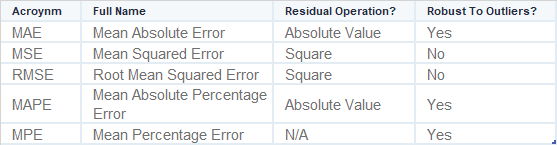

**Verification of --> Outliers in  data will contribute to much higher total error in the MSE than they would the MAE**

In [67]:
df = pd.read_csv(filename)
X = df[['Temperature (C)','Humidity','Wind Speed (km/h)','Pressure (millibars)']]
y= df['Apparent Temperature (C)']  
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
# fitting Multiple Linear regression to Training set
regressor =LinearRegression(n_jobs=4,normalize=False)
regressor.fit(X, y)
y_pred=regressor.predict(X)
print('Mean Squared Error: ', metrics.mean_squared_error(y, y_pred))

Mean Squared Error:  1.16248468992


In [82]:
import numpy as np   
import random
random_list = random.sample(range(100,200), 100) 

In [83]:
for index in random_list:
    y[index]=index


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [84]:
regressor =LinearRegression(n_jobs=4,normalize=False)
regressor.fit(X, y)
y_pred=regressor.predict(X)
print('Mean Squared Error: ', metrics.mean_squared_error(y, y_pred))

Mean Squared Error:  28.4850785533


In [85]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y, y_pred))

Mean Absolute Error:  1.08830734117
